University of Bedfordshire
**Santosh Rokaya**

**University ID : 2026581**

Follow the Link to view the Source Code:

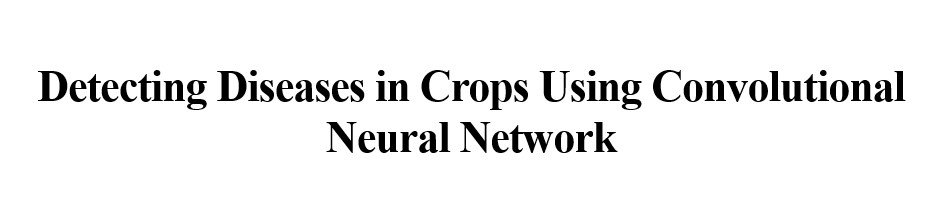

In this project, I will create a convolutional neural network which will detect whether a crop is suffering from a disease or not.

Different layers and other hyperparameters are used for building, training, validating and testing CNN classification model.

TensorFlow, numpy and Keras are used to implement this project.


# Steps to implement the Crop Disease Detection project
1. Mount the google drive on Google Collab Notebook and import the data set and extract the zip file
2. Import the required libraires
3. Visualizing the images and Resize images
4. Convert the images into a NumPy array and normalize them.
5. Visualize the class count and Check for class imbalance
6. Splitting the dataset into train, validate and test sets
7. Performing one-hot encoding on target variable
8. Creating the model architecture, compile the model and then fit it using the training data
9. Plot the accuracy and loss against each epoch
10. Make predictions on testing data
11. Visualizing the original and predicted labels for the test images
12. Deploy the project using Streamlit


## Step 1: Mount the google drive on Google Collab Notebook, extract and import the data set


In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Provide the path to the zip file
zip_file_path = '/content/drive/MyDrive/Crop-Disease-Detection/Dataset.zip'

# Specify the directory where you want to extract the contents
extracted_folder_path = '/content/drive/MyDrive/Crop-Disease-Detection/'

In [10]:
# Import the required library
import zipfile

# Unzip the file
with zipfile.ZipFile('/content/drive/MyDrive/Crop-Disease-Detection/Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f"Files extracted to: {extracted_folder_path}")

Files extracted to: /content/drive/MyDrive/Crop-Disease-Detection/


After mounting our drive I will locate the folder where our data is stored to use it in our colab notebook.

In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive/Crop-Disease-Detection".
!ls "/content/drive/My Drive/Crop-Disease-Detection/Dataset"


Apple_Apple_scab       Grape_Black_rot		   Potato_Early_blight	  Strawberry_Leaf_scorch
Blueberry_healthy      Orange_Citrus_greening	   Raspberry_healthy	  Tomato_Bacterial_spot
Cherry_Powdery_mildew  Peach_Bacterial_spot	   Soybean_healthy
Corn_Common_rust       Pepper_bell_Bacterial_spot  Squash_Powdery_mildew


## Step 2: Import the required libraires


Next we will import all the required libraries. As we are making a CNN model we will import all the required layers, activations, optimizers and many more.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [4]:
print(tf. __version__, np. __version__, cv2. __version__, keras. __version__)

2.15.0 1.23.5 4.8.0 2.15.0


## Step 3:Visualizing the images and Resize images


Now we will observe some of the images that are their in our dataset. We will plot 12 images here using the matplotlib library.

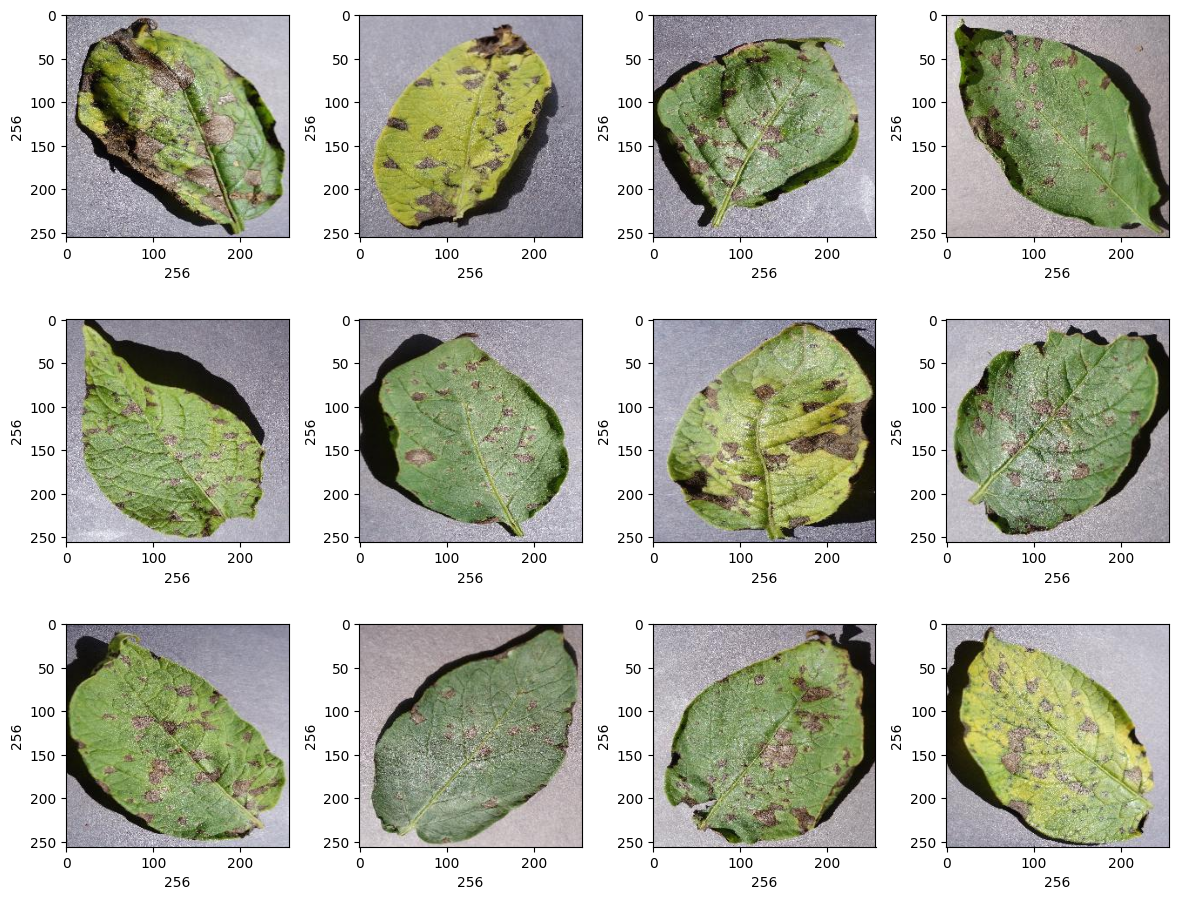

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Crop-Disease-Detection/Dataset/Potato_Early_blight"
for i in range(1,13):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

## Step 4: Convert the images into a NumPy array and normalize them.


After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

In [6]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Now we will convert all the images into numpy array.

In [7]:
dir = "/content/drive/My Drive/Crop-Disease-Detection/Dataset"
image_list, label_list = [], []
all_labels = ['Apple_Apple_scab', 'Blueberry_healthy', 'Cherry_Powdery_mildew', 'Corn_Common_rust', 'Grape_Black_rot', 'Raspberry_healthy',
              'Orange_Citrus_greening' , 'Pepper_bell_Bacterial_spot', 'Potato_Early_blight', 'Peach_Bacterial_spot', 'Soybean_healthy',
              'Squash_Powdery_mildew', 'Strawberry_Leaf_scorch', 'Tomato_Bacterial_spot']

binary_labels = list(range(14))
temp = -1

# Reading and converting image to numpy array
for directory in all_labels:
  crop_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in crop_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

## Step 5: Visualize the class count and Check for class imbalance


We will also observe the number of images under different classes to see if the dataset is balanced or not

Next we will observe the shape of the image.

In [8]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head(14)

0     300
1     300
2     300
3     300
4     300
5     300
6     300
7     300
8     300
9     300
10    300
11    300
12    300
13    300
dtype: int64

In [9]:
# Access the first image in numpy array the list, retrieve the shape of first image and print it.
image_list[0].shape

(256, 256, 3)

Checking the total number of the images which is the length of the labels list.

In [10]:
# Assuming label_list is your NumPy array
label_list = np.array(label_list)
# Count the total number of elements (images) in the array
total_images = label_list.size
# Print the result
print("Total Images:", total_images)

Total Images: 4200


## Step 6: Splitting the dataset into train, validate and test sets


Next we will use sklearn train_test_split to split the dataset into testing and training data. Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [11]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

In [12]:
# Normalize the data by dividing by 255
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0

# Reshape the data to fit the model
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

## Step 7: Performing one-hot encoding on target variable

In [13]:
# Convert the labels to one-hot vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Step 8: Creating the model architecture, compile the model and then fit it using the training data

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


In [14]:
# Create a sequential model.
model = Sequential()

# First convolutional layer with 32 filters, a 3x3 kernel size, and a ReLU activation function.
model.add(Conv2D(32, (3, 3), input_shape=(256,256,3),  activation='relu'))

# Max pooling layer with a 2x2 pool size.
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters, a 3x3 kernel size, and a ReLU activation function.
model.add(Conv2D(64, (3, 3), activation='relu'))

# Another max pooling layer with a 2x2 pool size.
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer with 128 filters, a 3x3 kernel size, and a ReLU activation function.
model.add(Conv2D(128, (3, 3), activation='relu'))

# Another max pooling layer with a 2x2 pool size.
model.add(MaxPooling2D((2, 2)))

# Fourth convolutional layer with 128 filters, a 3x3 kernel size, and a ReLU activation function.
model.add(Conv2D(128, (3, 3), activation='relu'))

# Another max pooling layer with a 2x2 pool size.
model.add(MaxPooling2D((2, 2)))

# A flattening layer  to flatten the output of the convolutional layers
model.add(Flatten())

# A fully connected layer with 128 units and a ReLU activation function.
model.add(Dense(128, activation='relu'))

# Adding dropout for regularization.
model.add(Dropout(0.5))


# Output layer with 14 units and a softmax activation function for the 14 classes.
model.add(Dense(14, activation='softmax'))

# Print a summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

While compiling the model we need to set the type of loss which will be Binary Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [15]:
# Compile the model with the Adam optimizer and the categorical crossentropy loss function.
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

Next we will split the training dataset into validation and training data.

In [16]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 10 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy but here we can see that the model has already raeched a very high accuracy so we don't need to run it for more. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [17]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
21/21 [==============================] - 23s 382ms/step - loss: 2.6135 - accuracy: 0.1004 - val_loss: 2.5517 - val_accuracy: 0.2173
Epoch 2/50
21/21 [==============================] - 6s 292ms/step - loss: 2.4654 - accuracy: 0.1927 - val_loss: 2.2626 - val_accuracy: 0.3170
Epoch 3/50
21/21 [==============================] - 6s 273ms/step - loss: 2.1647 - accuracy: 0.2883 - val_loss: 1.8674 - val_accuracy: 0.4792
Epoch 4/50
21/21 [==============================] - 7s 324ms/step - loss: 1.8837 - accuracy: 0.3731 - val_loss: 1.5692 - val_accuracy: 0.5521
Epoch 5/50
21/21 [==============================] - 6s 292ms/step - loss: 1.6293 - accuracy: 0.4766 - val_loss: 1.3531 - val_accuracy: 0.6518
Epoch 6/50
21/21 [==============================] - 6s 277ms/step - loss: 1.4311 - accuracy: 0.5443 - val_loss: 1.1124 - val_accuracy: 0.7307
Epoch 7/50
21/21 [==============================] - 6s 296ms/step - loss: 1.2772 - accuracy: 0.5941 - val_loss: 0.9632 - val_accuracy: 0.7649
Epoch

Saving the model using different techniques.

In [ ]:
model.save("/content/drive/My Drive/Crop-Disease-Detection/Model/crop_disease_detection_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Step 9: Plot the accuracy and loss against each epoch

Next we will plot the accuracy of the model for the trainig history.

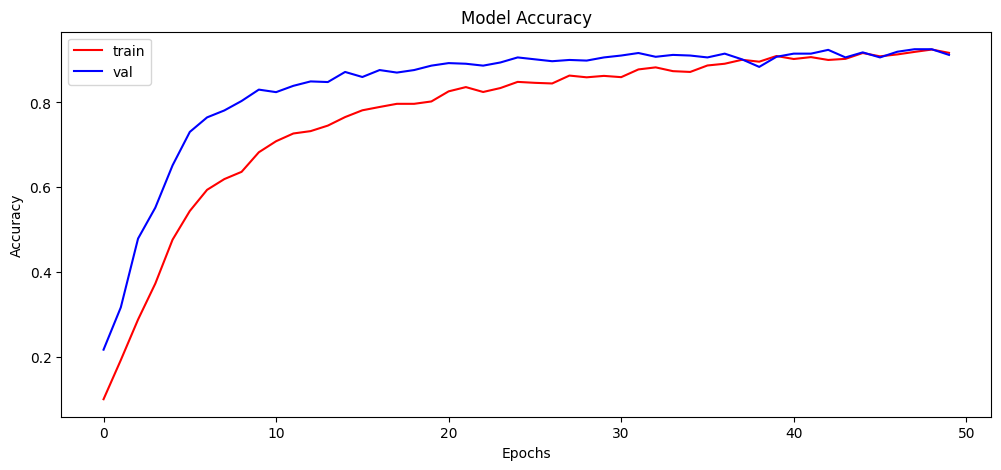

In [18]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Evaluating the model to know the accuracy of the model.


In [19]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
27/27 [==============================] - 1s 41ms/step - loss: 0.3004 - accuracy: 0.9107
Test Accuracy: 91.07142686843872


## Step 10: Make predictions on testing data

Next we will use our model to predict predicting the testing dataset label.

In [20]:
y_pred = model.predict(x_test)

27/27 [==============================] - 1s 23ms/step


## Step 11: Visualizing the original and predicted labels for the test images

Printing out the original and the predicted label.

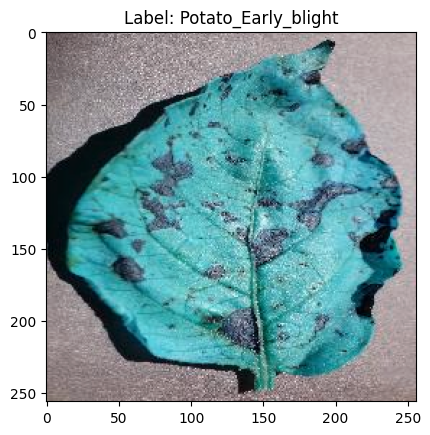

In [21]:
# Plotting the image
plt.imshow(array_to_img(x_test[11]))

# Adding the label as the title
plt.title("Label: " + all_labels[np.argmax(y_test[11])])
plt.show()

In [22]:
# Finding max value from prediction list and comaparing original value vs predicted
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[11])])
print("Predictions for all classes: ", y_pred[11])

Original Label:  Potato_Early_blight
Predicted Label:  Potato_Early_blight
Predictions for all classes:  [5.2409654e-10 2.6913832e-10 2.7323821e-08 1.7513391e-07 1.8995411e-08
 3.7846890e-09 2.1238181e-11 3.8483944e-07 9.9998045e-01 1.0636836e-12
 1.1045137e-07 4.8431502e-12 1.8777502e-05 9.7502073e-10]


In [23]:
for i in range(50):
  print (all_labels[np.argmax(y_test[i])], "-", all_labels[np.argmax(y_pred[i])])

Tomato_Bacterial_spot - Tomato_Bacterial_spot
Cherry_Powdery_mildew - Cherry_Powdery_mildew
Cherry_Powdery_mildew - Cherry_Powdery_mildew
Peach_Bacterial_spot - Peach_Bacterial_spot
Cherry_Powdery_mildew - Apple_Apple_scab
Orange_Citrus_greening - Orange_Citrus_greening
Corn_Common_rust - Corn_Common_rust
Apple_Apple_scab - Peach_Bacterial_spot
Squash_Powdery_mildew - Squash_Powdery_mildew
Orange_Citrus_greening - Orange_Citrus_greening
Orange_Citrus_greening - Orange_Citrus_greening
Potato_Early_blight - Potato_Early_blight
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Raspberry_healthy - Raspberry_healthy
Squash_Powdery_mildew - Squash_Powdery_mildew
Strawberry_Leaf_scorch - Tomato_Bacterial_spot
Apple_Apple_scab - Cherry_Powdery_mildew
Corn_Common_rust - Corn_Common_rust
Squash_Powdery_mildew - Squash_Powdery_mildew
Apple_Apple_scab - Strawberry_Leaf_scorch
Soybean_healthy - Soybean_healthy
Soybean_healthy - Soybean_healthy
Strawberry_Leaf_scorch - Strawberry_L

## Conclusion

We started the implementation of project with loading the dataset into google colab from google drive and visualizing the images. Normalizing is an important step when working with any type of dataset. After that we created a CNN Model which is further used for predicting the plant leaf diseases using the image supplied to model.
This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yield and stop wastage of crops due to disease.

## Step 12: Deploy the project using Streamlit
